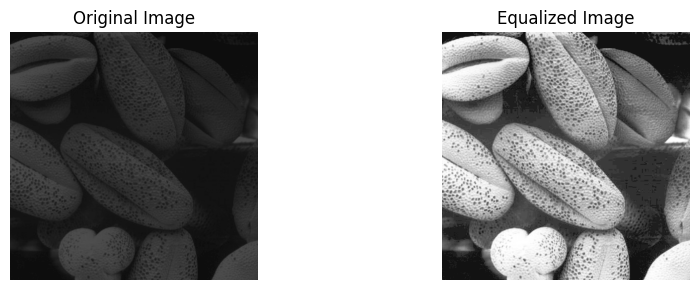

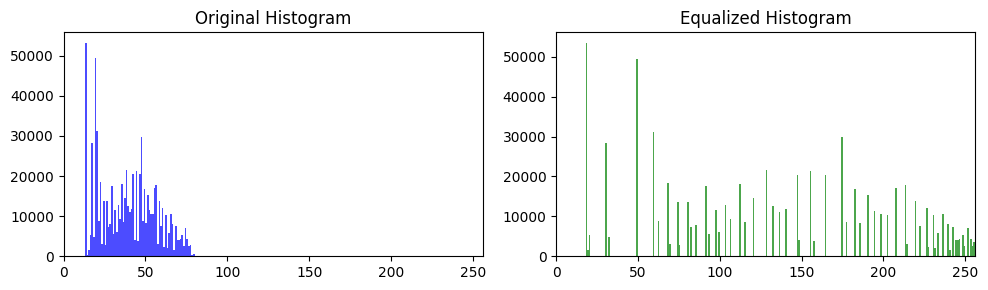

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image_path = "/kaggle/input/images-for-cv/img_003.tif"    
image = cv2.imread(image_path)

# Step 1: Compute the histogram manually
flat_image = image.flatten()
hist = np.zeros(256)  # 256 intensity values (0 to 255)

# Compute histogram from scratch
for pixel in flat_image:
    hist[pixel] += 1  # Increment the histogram at the pixel value's position

# Step 2: Compute the CDF from scratch
cdf = np.zeros_like(hist)
cdf[0] = hist[0]
for i in range(1, len(hist)):
    cdf[i] = cdf[i - 1] + hist[i]

# Step 3: Normalize the CDF to be in the range [0, 255]
cdf_min = cdf.min()
cdf_normalized = (cdf - cdf_min) * 255 / (cdf.max() - cdf_min)
cdf_normalized = np.round(cdf_normalized).astype(int)

# Step 4: Map the original image values using the normalized CDF
equalized_image = np.zeros_like(flat_image)
for i in range(len(flat_image)):
    equalized_image[i] = cdf_normalized[flat_image[i]]

# Reshape the equalized image to its original shape
equalized_image = equalized_image.reshape(image.shape)

# Plot the original and equalized images
plt.figure(figsize=(10, 3))

# Original Image
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

# Equalized Image
plt.subplot(1, 2, 2)
plt.title("Equalized Image")
plt.imshow(equalized_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

# Plot the original and equalized histograms
plt.figure(figsize=(10, 3))

# Original Histogram
plt.subplot(1, 2, 1)
plt.title("Original Histogram")
plt.hist(flat_image, bins=256, range=(0, 256), color='blue', alpha=0.7)
plt.xlim([0, 256])

# Equalized Histogram
plt.subplot(1, 2, 2)
plt.title("Equalized Histogram")
plt.hist(equalized_image.flatten(), bins=256, range=(0, 256), color='green', alpha=0.7)
plt.xlim([0, 256])

plt.tight_layout()
plt.show()

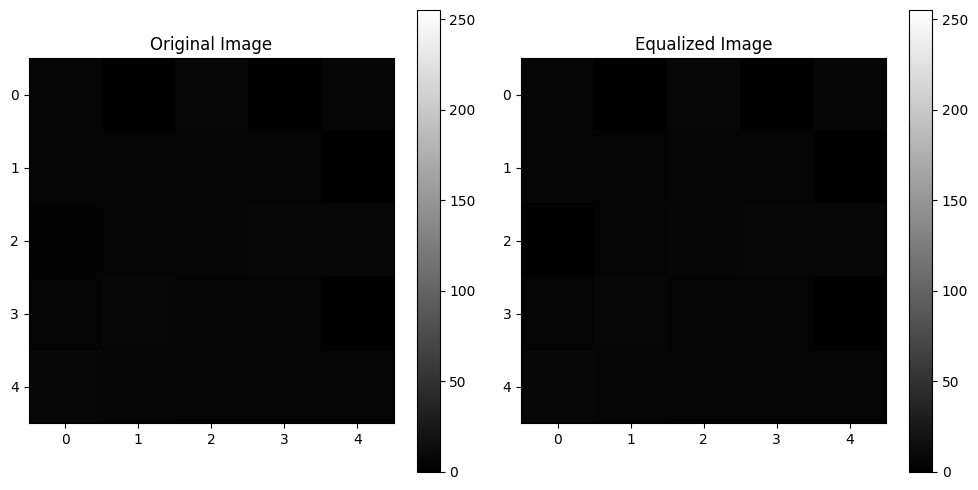

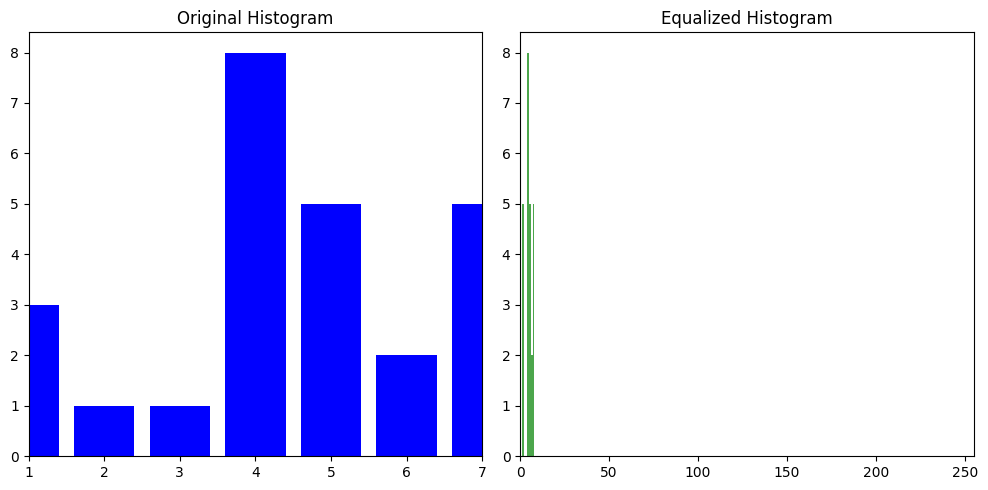

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Original Image Matrix (Grayscale, 5x5) as an example
image = np.array([
    [5, 1, 7, 2, 6],
    [5, 4, 5, 5, 1],
    [3, 4, 6, 7, 7],
    [4, 7, 4, 4, 1],
    [7, 5, 4, 4, 4]
])

# Step 1: Compute the histogram manually (from scratch)
min_intensity = np.min(image)  # Find the minimum intensity value
max_intensity = np.max(image)  # Find the maximum intensity value

# Initialize the histogram array with zeros for each possible intensity
hist = np.zeros(max_intensity - min_intensity + 1, dtype=int)

# Count occurrences of each intensity
for row in image:
    for pixel in row:
        hist[pixel - min_intensity] += 1  # Subtract min_intensity for zero-based indexing

# Step 2: Compute the PDF (Probability Distribution Function) manually
total_pixels = image.size
pdf = hist / total_pixels  # PDF is the normalized histogram (each count divided by total pixels)

# Step 3: Compute the CDF (Cumulative Distribution Function) manually
cdf = np.zeros_like(pdf)
cdf[0] = pdf[0]  # First value of CDF is the first value of the PDF
for i in range(1, len(pdf)):
    cdf[i] = cdf[i - 1] + pdf[i]  # Sum the PDF values to calculate CDF

# Step 4: Normalize the CDF to the range [0, 255]
cdf_normalized = np.round(cdf * (8 - 1)).astype(int)  # Scale CDF to range from 0 to 255

# Step 5: Map the original pixel values to their equalized values
equalized_image = np.zeros_like(image)  # Create an empty matrix for the equalized image
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        equalized_image[i, j] = cdf_normalized[image[i, j] - min_intensity]  # Map based on CDF

# Display Original and Equalized Images
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.colorbar()

# Equalized Image
plt.subplot(1, 2, 2)
plt.title("Equalized Image")
plt.imshow(equalized_image, cmap='gray', vmin=0, vmax=255)
plt.colorbar()

plt.tight_layout()
plt.show()

# Display histograms
plt.figure(figsize=(10, 5))

# Original Histogram
plt.subplot(1, 2, 1)
plt.title("Original Histogram")
plt.bar(np.arange(min_intensity, max_intensity + 1), hist, color='blue')
plt.xlim([min_intensity, max_intensity])

# Equalized Histogram
plt.subplot(1, 2, 2)
plt.title("Equalized Histogram")
plt.hist(equalized_image.flatten(), bins=256, range=[0, 256], color='green', alpha=0.7)
plt.xlim([0, 255])

plt.tight_layout()
plt.show()

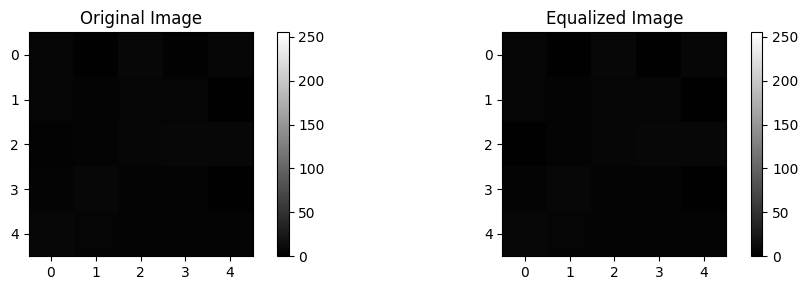

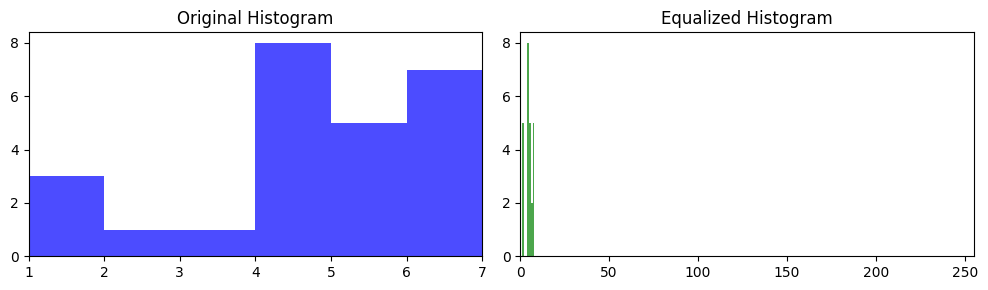

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Original Image Matrix (Grayscale, 4x4) from the PDF
image = np.array([
    [5, 1, 7, 2, 6],
    [5, 4, 5, 5, 1],
    [3, 4, 6, 7, 7],
    [4, 7, 4, 4, 1],
    [7, 5, 4, 4, 4]
])

# Step 1: Compute the histogram
min_intensity = np.min(image)
max_intensity = np.max(image)
hist, bins = np.histogram(image.flatten(), bins=max_intensity - min_intensity + 1, range=(min_intensity, max_intensity + 1))

# Step 2: Calculate the PDF (Probability Distribution Function)
total_pixels = image.size
pdf = hist / total_pixels

# Step 3: Compute the CDF (Cumulative Distribution Function)
cdf = np.cumsum(pdf)

# Step 4: Compute the equalized intensity values
equalized_values = np.round(cdf * (8 - 1)).astype(int)

# Mapping from intensity levels in the original image to the new equalized values
mapping = {intensity: equalized_values[i] for i, intensity in enumerate(range(min_intensity, max_intensity + 1))}

# Step 5: Replace original intensity values with equalized values
equalized_image = np.copy(image)
for i in range(equalized_image.shape[0]):
    for j in range(equalized_image.shape[1]):
        equalized_image[i, j] = mapping[equalized_image[i, j]]

# Display Original and Equalized Images
plt.figure(figsize=(10, 3))

# Original Image
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.colorbar()

# Equalized Image
plt.subplot(1, 2, 2)
plt.title("Equalized Image")
plt.imshow(equalized_image, cmap='gray', vmin=0, vmax=255)
plt.colorbar()

plt.tight_layout()
plt.show()

# Display histograms
plt.figure(figsize=(10, 3))

# Original Histogram
plt.subplot(1, 2, 1)
plt.title("Original Histogram")
plt.hist(image.flatten(), bins=np.arange(min_intensity, max_intensity + 1), color='blue', alpha=0.7)
plt.xlim([min_intensity, max_intensity])

# Equalized Histogram
plt.subplot(1, 2, 2)
plt.title("Equalized Histogram")
plt.hist(equalized_image.flatten(), bins=256, range=[0, 256], color='green', alpha=0.7)
plt.xlim([0, 255])

plt.tight_layout()
plt.show()

In [4]:
import numpy as np

# --- Elementwise arithmetic operations ---
a = np.array([1, 2, 3, 4]).reshape(-1, 1)  # Column vector
print("2 * a =", 2 * a)                   # Scalar multiplication
print("a / 4 =", a / 4)                   # Scalar division

b = np.array([5, 6, 7, 8]).reshape(-1, 1)  # Another column vector
print("a + b =", a + b)                   # Vector addition
print("a - b =", a - b)                   # Vector subtraction

print("a ** 2 =", a ** 2)                 # Element-wise squaring
print("a * b =", a * b)                   # Element-wise multiplication
print("a / b =", a / b)                   # Element-wise division

# Element-wise logarithm
print("log([1, 2, 3, 4]) =", np.log([1, 2, 3, 4]))

# Element-wise rounding to nearest integer
print("round([[1.5, 2], [2.2, 3.1]]) =", np.round([[1.5, 2], [2.2, 3.1]]))

# --- Other operations ---
print("floor(5.3) =", np.floor(5.3))  # Floor function
print("ceil(5.3) =", np.ceil(5.3))    # Ceil function

# --- Vector arithmetic operations ---
a = np.array([1, 4, 6, 3])  # A row vector
print("sum(a) =", np.sum(a))           # Sum of vector elements
print("mean(a) =", np.mean(a))         # Mean of vector elements
print("var(a) =", np.var(a))           # Variance of elements
print("std(a) =", np.std(a))           # Standard deviation

print("max(a) =", np.max(a))           # Maximum
print("min(a) =", np.min(a))           # Minimum

# If a matrix is given, then these functions will operate on each column
a = np.array([[1, 2, 3], [4, 5, 6]])  # A matrix
print("mean(a) =", np.mean(a, axis=0)) # Mean of each column
print("max(a) =", np.max(a, axis=0))   # Max of each column
print("max(max(a)) =", np.max(a))      # Obtaining the max of the matrix
print("mean(a, 2) =", np.mean(a, axis=1))  # Mean of each row

# --- Matrix operations ---
# Dot product (1x3 row vector times 3x1 column vector)
print("[1, 2, 3] dot [4, 5, 6] =", np.dot([1, 2, 3], [4, 5, 6]))

# Outer product (3x1 column vector times 1x3 row vector)
print("[[1], [2], [3]] * [4, 5, 6] =", np.outer([1, 2, 3], [4, 5, 6]))

2 * a = [[2]
 [4]
 [6]
 [8]]
a / 4 = [[0.25]
 [0.5 ]
 [0.75]
 [1.  ]]
a + b = [[ 6]
 [ 8]
 [10]
 [12]]
a - b = [[-4]
 [-4]
 [-4]
 [-4]]
a ** 2 = [[ 1]
 [ 4]
 [ 9]
 [16]]
a * b = [[ 5]
 [12]
 [21]
 [32]]
a / b = [[0.2       ]
 [0.33333333]
 [0.42857143]
 [0.5       ]]
log([1, 2, 3, 4]) = [0.         0.69314718 1.09861229 1.38629436]
round([[1.5, 2], [2.2, 3.1]]) = [[2. 2.]
 [2. 3.]]
floor(5.3) = 5.0
ceil(5.3) = 6.0
sum(a) = 14
mean(a) = 3.5
var(a) = 3.25
std(a) = 1.8027756377319946
max(a) = 6
min(a) = 1
mean(a) = [2.5 3.5 4.5]
max(a) = [4 5 6]
max(max(a)) = 6
mean(a, 2) = [2. 5.]
[1, 2, 3] dot [4, 5, 6] = 32
[[1], [2], [3]] * [4, 5, 6] = [[ 4  5  6]
 [ 8 10 12]
 [12 15 18]]


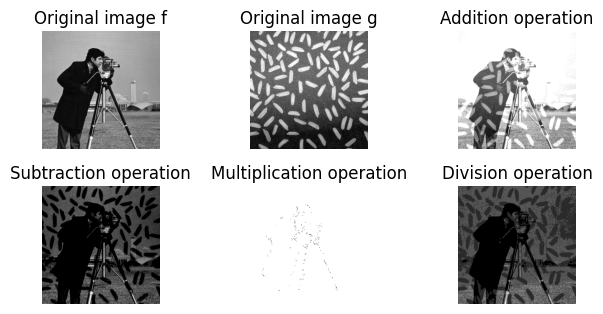

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load images in grayscale
f = cv2.imread('/kaggle/input/images-for-cv/cameraman.jpg', cv2.IMREAD_GRAYSCALE)
g = cv2.imread('/kaggle/input/images-for-cv/rice.png', cv2.IMREAD_GRAYSCALE)


# Perform arithmetic operations
s_a = cv2.add(f, g)          # Addition
s_b = cv2.subtract(f, g)      # Subtraction
s_c = cv2.multiply(f, g)      # Multiplication
s_d = cv2.divide(f, g)        # Division (note: results will be in floating point)

# Display images and results
plt.subplot(3, 3, 1)
plt.imshow(f, cmap='gray')
plt.title('Original image f')
plt.axis('off')

plt.subplot(3, 3, 2)
plt.imshow(g, cmap='gray')
plt.title('Original image g')
plt.axis('off')

plt.subplot(3, 3, 3)
plt.imshow(s_a, cmap='gray')
plt.title('Addition operation')
plt.axis('off')

plt.subplot(3, 3, 4)
plt.imshow(s_b, cmap='gray')
plt.title('Subtraction operation')
plt.axis('off')

plt.subplot(3, 3, 5)
plt.imshow(s_c, cmap='gray')
plt.title('Multiplication operation')
plt.axis('off')

plt.subplot(3, 3, 6)
plt.imshow(s_d, cmap='gray')
plt.title('Division operation')
plt.axis('off')

# Show the plots
plt.tight_layout()
plt.show()


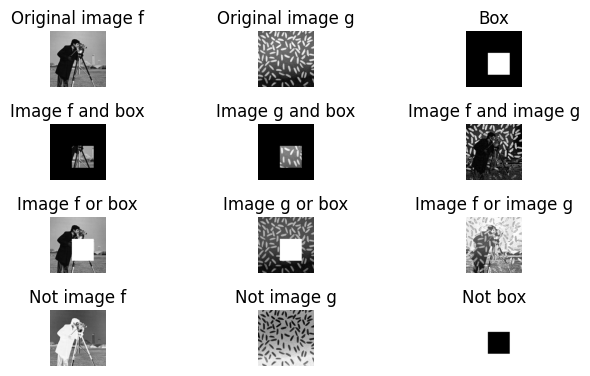

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load images in grayscale
f = cv2.imread('/kaggle/input/images-for-cv/cameraman.jpg', cv2.IMREAD_GRAYSCALE)
g = cv2.imread('/kaggle/input/images-for-cv/rice.png', cv2.IMREAD_GRAYSCALE)

# Plot the original images
plt.subplot(5, 3, 1)
plt.imshow(f, cmap='gray')
plt.title('Original image f')
plt.axis('off')

plt.subplot(5, 3, 2)
plt.imshow(g, cmap='gray')
plt.title('Original image g')
plt.axis('off')

# Create a box (a black image with a white box in the center)
c = np.zeros(f.shape, dtype=np.uint8)
c[100:200, 100:200] = 255  # Draw a white box
plt.subplot(5, 3, 3)
plt.imshow(c, cmap='gray')
plt.title('Box')
plt.axis('off')

# AND operation (image f and box)
fANDc = cv2.bitwise_and(f, c)
plt.subplot(5, 3, 4)
plt.imshow(fANDc, cmap='gray')
plt.title('Image f and box')
plt.axis('off')

# AND operation (image g and box)
gANDc = cv2.bitwise_and(g, c)
plt.subplot(5, 3, 5)
plt.imshow(gANDc, cmap='gray')
plt.title('Image g and box')
plt.axis('off')

# AND operation (image f and image g)
fANDg = cv2.bitwise_and(f, g)
plt.subplot(5, 3, 6)
plt.imshow(fANDg, cmap='gray')
plt.title('Image f and image g')
plt.axis('off')

# OR operation (image f and box)
fORc = cv2.bitwise_or(f, c)
plt.subplot(5, 3, 7)
plt.imshow(fORc, cmap='gray')
plt.title('Image f or box')
plt.axis('off')

# OR operation (image g and box)
gORc = cv2.bitwise_or(g, c)
plt.subplot(5, 3, 8)
plt.imshow(gORc, cmap='gray')
plt.title('Image g or box')
plt.axis('off')

# OR operation (image f and image g)
fORg = cv2.bitwise_or(f, g)
plt.subplot(5, 3, 9)
plt.imshow(fORg, cmap='gray')
plt.title('Image f or image g')
plt.axis('off')

# NOT operation (not image f)
NOTf = cv2.bitwise_not(f)
plt.subplot(5, 3, 10)
plt.imshow(NOTf, cmap='gray')
plt.title('Not image f')
plt.axis('off')

# NOT operation (not image g)
NOTg = cv2.bitwise_not(g)
plt.subplot(5, 3, 11)
plt.imshow(NOTg, cmap='gray')
plt.title('Not image g')
plt.axis('off')

# NOT operation (not box)
NOTc = cv2.bitwise_not(c)
plt.subplot(5, 3, 12)
plt.imshow(NOTc, cmap='gray')
plt.title('Not box')
plt.axis('off')

# Show the plots
plt.tight_layout()
plt.show()

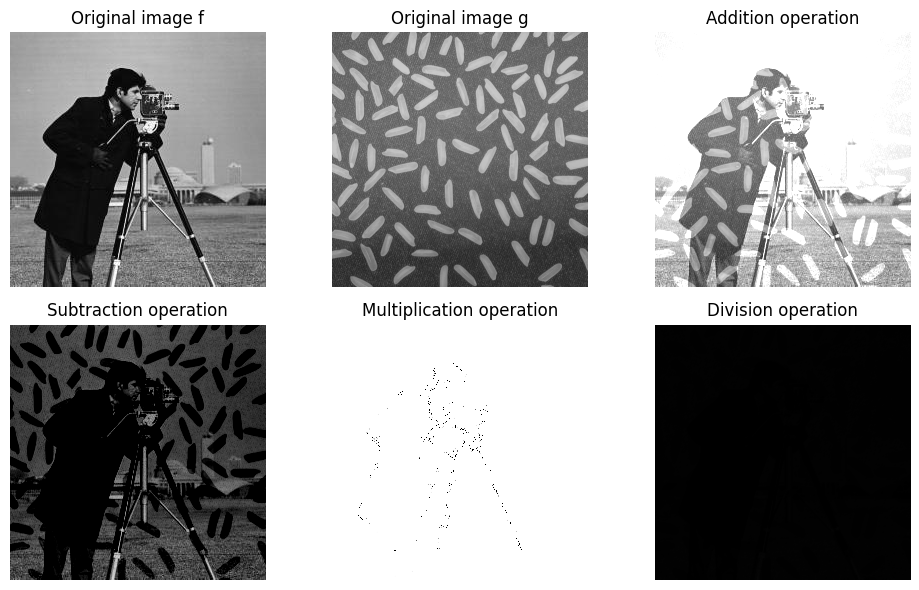

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Addition operation function
def image_addition(image1, image2):
    height1, width1, channels1 = image1.shape
    height2, width2, channels2 = image2.shape

    if channels1 != channels2:
        print('The number of channels in two images must be the same.')
        return None
    elif height1 != height2:
        print('The heights of two images must be the same.')
        return None
    elif width1 != width2:
        print('The widths of two images must be the same.')
        return None
    else:
        # Perform addition
        result = cv2.add(image1, image2)  # Automatically handles pixel values > 255
        return result

# Subtraction operation function
def image_subtraction(image1, image2):
    height1, width1, channels1 = image1.shape
    height2, width2, channels2 = image2.shape

    if channels1 != channels2:
        print('The number of channels in two images must be the same.')
        return None
    elif height1 != height2:
        print('The heights of two images must be the same.')
        return None
    elif width1 != width2:
        print('The widths of two images must be the same.')
        return None
    else:
        # Perform subtraction
        result = cv2.subtract(image1, image2)  # Automatically handles pixel values < 0
        return result

# Multiplication operation function
def image_multiplication(image1, image2):
    height1, width1, channels1 = image1.shape
    height2, width2, channels2 = image2.shape

    if channels1 != channels2:
        print('The number of channels in two images must be the same.')
        return None
    elif height1 != height2:
        print('The heights of two images must be the same.')
        return None
    elif width1 != width2:
        print('The widths of two images must be the same.')
        return None
    else:
        # Perform multiplication
        result = cv2.multiply(image1, image2)
        return result

# Division operation function
def image_division(image1, image2):
    height1, width1, channels1 = image1.shape
    height2, width2, channels2 = image2.shape

    if channels1 != channels2:
        print('The number of channels in two images must be the same.')
        return None
    elif height1 != height2:
        print('The heights of two images must be the same.')
        return None
    elif width1 != width2:
        print('The widths of two images must be the same.')
        return None
    else:
        # Perform division
        result = cv2.divide(image1, image2)
        return result

# Load images in grayscale
f = cv2.imread('/kaggle/input/images-for-cv/cameraman.jpg')
g = cv2.imread('/kaggle/input/images-for-cv/rice.png')

# Display original images
plt.figure(figsize=(10, 6))
plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(f, cv2.COLOR_BGR2RGB))
plt.title('Original image f')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(cv2.cvtColor(g, cv2.COLOR_BGR2RGB))
plt.title('Original image g')
plt.axis('off')

# Call functions for addition, subtraction, multiplication, and division
s_a = image_addition(f, g)
if s_a is not None:
    plt.subplot(2, 3, 3)
    plt.imshow(cv2.cvtColor(s_a, cv2.COLOR_BGR2RGB))
    plt.title('Addition operation')
    plt.axis('off')

s_b = image_subtraction(f, g)
if s_b is not None:
    plt.subplot(2, 3, 4)
    plt.imshow(cv2.cvtColor(s_b, cv2.COLOR_BGR2RGB))
    plt.title('Subtraction operation')
    plt.axis('off')

s_c = image_multiplication(f, g)
if s_c is not None:
    plt.subplot(2, 3, 5)
    plt.imshow(cv2.cvtColor(s_c, cv2.COLOR_BGR2RGB))
    plt.title('Multiplication operation')
    plt.axis('off')

s_d = image_division(f, g)
if s_d is not None:
    plt.subplot(2, 3, 6)
    plt.imshow(cv2.cvtColor(s_d, cv2.COLOR_BGR2RGB))
    plt.title('Division operation')
    plt.axis('off')

# Show the plots
plt.tight_layout()
plt.show()

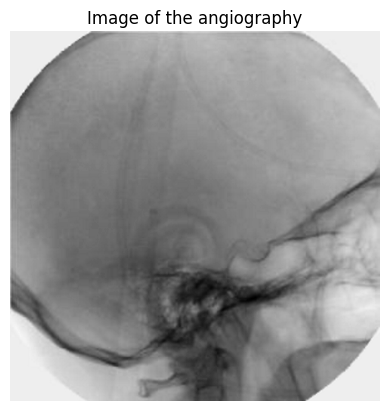

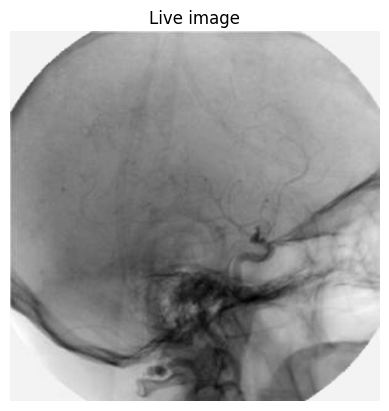

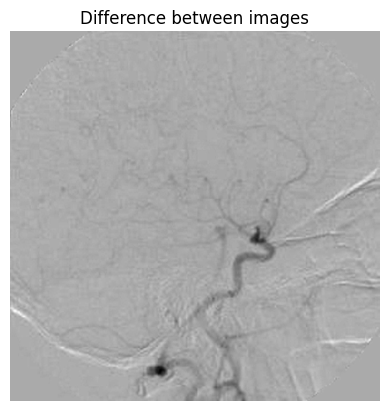

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure

# Function to convert the image to float type between 0 and 1
def tofloat(image):
    return image.astype(np.float32) / 255

# Load the first image (mask X-ray image of the angiography)
f = cv2.imread('/kaggle/input/images-for-cv/Fig0228(a).tif', cv2.IMREAD_GRAYSCALE)
f = tofloat(f)  # Convert to float
plt.figure()
plt.imshow(f, cmap='gray')
plt.title('Image of the angiography')
plt.axis('off')

# Load the second image (live image)
g = cv2.imread('/kaggle/input/images-for-cv/Fig0228(b).tif', cv2.IMREAD_GRAYSCALE)
g = tofloat(g)  # Convert to float
plt.figure()
plt.imshow(g, cmap='gray')
plt.title('Live image')
plt.axis('off')

# Subtract the live image from the mask image
s = f - g
plt.figure()
plt.imshow(1 - s, cmap='gray')  # imcomplement equivalent in Python
plt.title('Difference between images')
plt.axis('off')

plt.show()

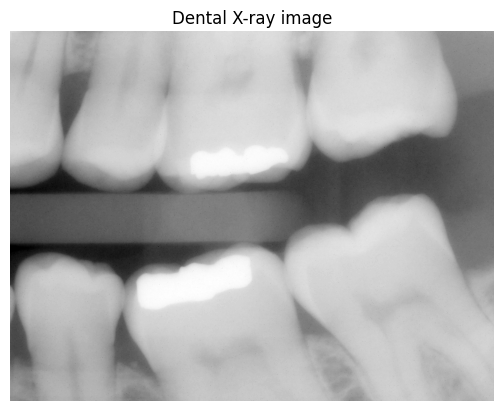

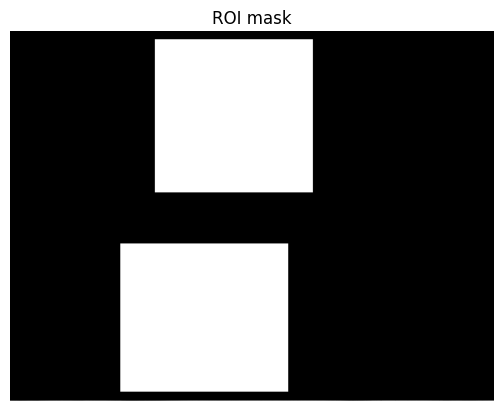

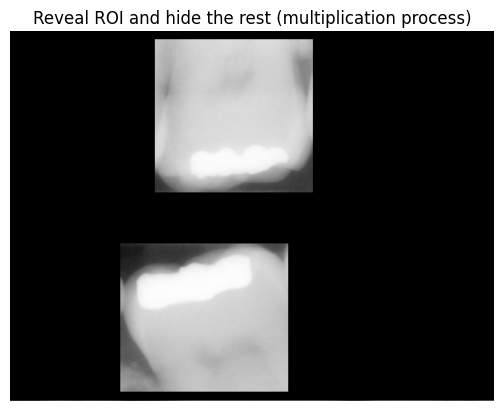

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to convert the image to float type between 0 and 1
def tofloat(image):
    return image.astype(np.float32) / 255

# Load the digital dental X-ray image
f = cv2.imread('/kaggle/input/images-for-cv/Fig0230(a).tif', cv2.IMREAD_GRAYSCALE)
f = tofloat(f)  # Convert to float
plt.figure()
plt.imshow(f, cmap='gray')
plt.title('Dental X-ray image')
plt.axis('off')

# Load the ROI mask for isolating teeth with fillings
g = cv2.imread('/kaggle/input/images-for-cv/Fig0230(b).tif', cv2.IMREAD_GRAYSCALE)
g = tofloat(g)  # Convert to float
plt.figure()
plt.imshow(g, cmap='gray')
plt.title('ROI mask')
plt.axis('off')

# Perform multiplication to reveal ROI and hide the rest
result = f * g  # Element-wise multiplication (similar to MATLAB's immultiply)
plt.figure()
plt.imshow(result, cmap='gray')
plt.title('Reveal ROI and hide the rest (multiplication process)')
plt.axis('off')

# Show the plots
plt.show()


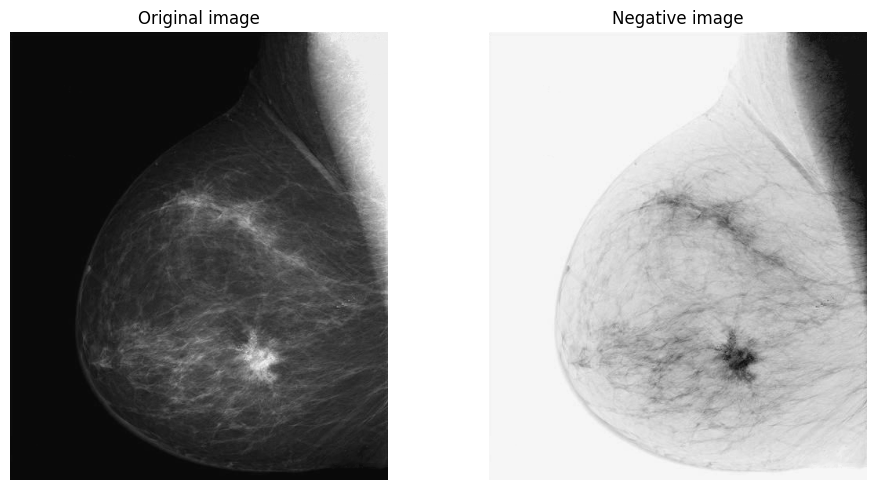

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
I = cv2.imread('/kaggle/input/images-for-cv/Fig0304(a).tif', cv2.IMREAD_GRAYSCALE)

# Max intensity value (for 8-bit image, L = 256)
k = 8
L = 2**k

# Generate the negative of the image
img_neg = (L - 1) - I

# Display the original and negative images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(I, cmap='gray')
plt.title('Original image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_neg, cmap='gray')
plt.title('Negative image')
plt.axis('off')

# Show the plots
plt.tight_layout()
plt.show()



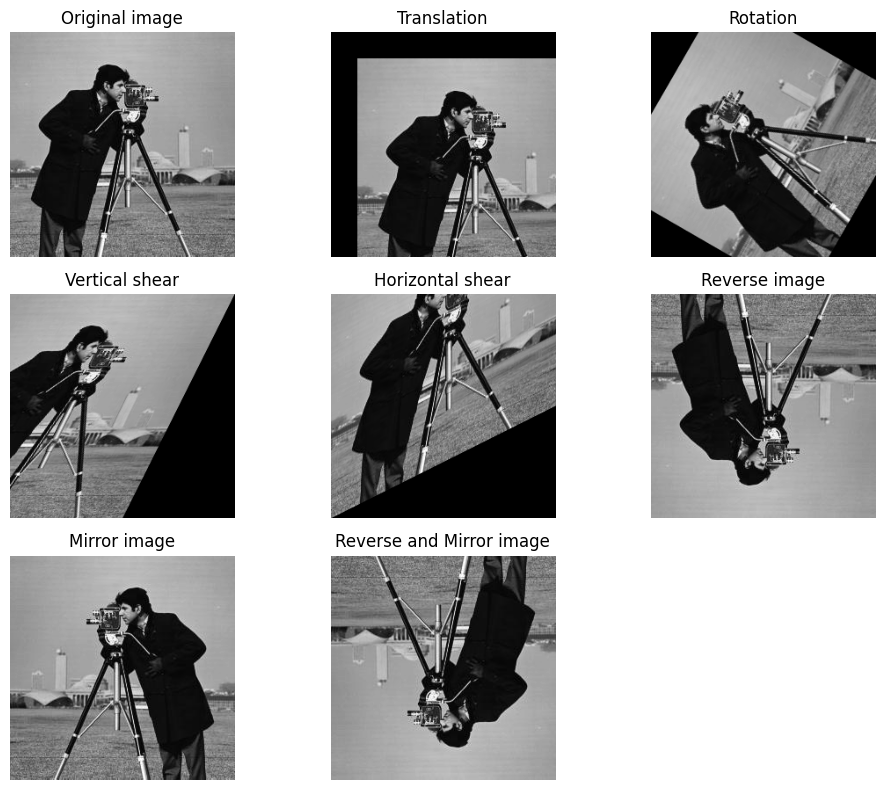

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import transform as tf

# Load the image
I = cv2.imread('/kaggle/input/images-for-cv/cameraman.jpg', cv2.IMREAD_GRAYSCALE)

# Image translation by (30, 30)
translate_matrix = np.float32([[1, 0, 30], [0, 1, 30]])
translate_img = cv2.warpAffine(I, translate_matrix, (I.shape[1], I.shape[0]))

# Image rotation by 60 degrees
(h, w) = I.shape[:2]
center = (w // 2, h // 2)
rotate_matrix = cv2.getRotationMatrix2D(center, 60, 1.0)
rotate_img = cv2.warpAffine(I, rotate_matrix, (w, h))

# Vertical shear (affine transformation)
v_matrix = np.float32([[1, 0.5, 0], [0, 1, 0], [0, 0, 1]])
vJ = tf.warp(I, tf.AffineTransform(matrix=v_matrix))

# Horizontal shear (affine transformation)
h_matrix = np.float32([[1, 0, 0], [0.5, 1, 0], [0, 0, 1]])
hJ = tf.warp(I, tf.AffineTransform(matrix=h_matrix))

# Reverse image (flip vertically)
R = cv2.flip(I, 0)

# Mirror image (flip horizontally)
M = cv2.flip(I, 1)

# Reverse and mirror image
RM = cv2.flip(R, 1)

# Display all transformations
plt.figure(figsize=(10, 8))

plt.subplot(3, 3, 1)
plt.imshow(I, cmap='gray')
plt.title('Original image')
plt.axis('off')

plt.subplot(3, 3, 2)
plt.imshow(translate_img, cmap='gray')
plt.title('Translation')
plt.axis('off')

plt.subplot(3, 3, 3)
plt.imshow(rotate_img, cmap='gray')
plt.title('Rotation')
plt.axis('off')

plt.subplot(3, 3, 4)
plt.imshow(vJ, cmap='gray')
plt.title('Vertical shear')
plt.axis('off')

plt.subplot(3, 3, 5)
plt.imshow(hJ, cmap='gray')
plt.title('Horizontal shear')
plt.axis('off')

plt.subplot(3, 3, 6)
plt.imshow(R, cmap='gray')
plt.title('Reverse image')
plt.axis('off')

plt.subplot(3, 3, 7)
plt.imshow(M, cmap='gray')
plt.title('Mirror image')
plt.axis('off')

plt.subplot(3, 3, 8)
plt.imshow(RM, cmap='gray')
plt.title('Reverse and Mirror image')
plt.axis('off')

# Show the plots
plt.tight_layout()
plt.show()

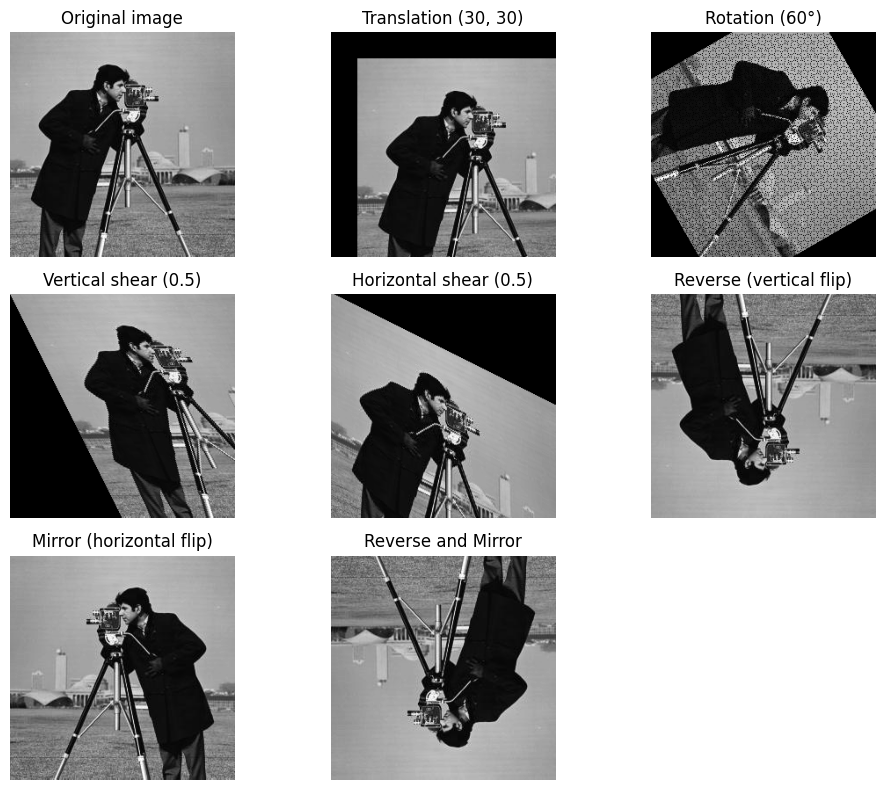

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Load an image from a file (grayscale)
def load_image(filepath):
    return plt.imread(filepath) if plt.imread(filepath).ndim == 2 else plt.imread(filepath)[:, :, 0]

# Function to translate an image by (tx, ty)
def translate_image(image, tx, ty):
    height, width = image.shape
    translated = np.zeros_like(image)

    for y in range(height):
        for x in range(width):
            new_x = x + tx
            new_y = y + ty
            if 0 <= new_x < width and 0 <= new_y < height:
                translated[new_y, new_x] = image[y, x]
    
    return translated

# Function to rotate an image by a given angle (counterclockwise)
def rotate_image(image, angle):
    height, width = image.shape
    rotated = np.zeros_like(image)
    angle_rad = np.deg2rad(angle)
    cx, cy = width // 2, height // 2

    for y in range(height):
        for x in range(width):
            new_x = int((x - cx) * np.cos(angle_rad) - (y - cy) * np.sin(angle_rad) + cx)
            new_y = int((x - cx) * np.sin(angle_rad) + (y - cy) * np.cos(angle_rad) + cy)
            if 0 <= new_x < width and 0 <= new_y < height:
                rotated[new_y, new_x] = image[y, x]

    return rotated

# Function to apply vertical shearing to an image
def vertical_shear(image, shear_factor):
    height, width = image.shape
    sheared = np.zeros_like(image)

    for y in range(height):
        for x in range(width):
            new_x = int(x + shear_factor * y)
            if 0 <= new_x < width:
                sheared[y, new_x] = image[y, x]

    return sheared

# Function to apply horizontal shearing to an image
def horizontal_shear(image, shear_factor):
    height, width = image.shape
    sheared = np.zeros_like(image)

    for y in range(height):
        for x in range(width):
            new_y = int(y + shear_factor * x)
            if 0 <= new_y < height:
                sheared[new_y, x] = image[y, x]

    return sheared

# Function to reverse (flip vertically) an image
def reverse_image(image):
    return image[::-1, :]

# Function to mirror (flip horizontally) an image
def mirror_image(image):
    return image[:, ::-1]

# Function to reverse and mirror an image
def reverse_mirror_image(image):
    return reverse_image(mirror_image(image))

# Load the image
I = load_image('/kaggle/input/images-for-cv/cameraman.jpg')

# Perform transformations from scratch
translate_img = translate_image(I, 30, 30)
rotate_img = rotate_image(I, 60)
vJ = vertical_shear(I, 0.5)
hJ = horizontal_shear(I, 0.5)
R = reverse_image(I)
M = mirror_image(I)
RM = reverse_mirror_image(I)

# Display all transformations
plt.figure(figsize=(10, 8))

plt.subplot(3, 3, 1)
plt.imshow(I, cmap='gray')
plt.title('Original image')
plt.axis('off')

plt.subplot(3, 3, 2)
plt.imshow(translate_img, cmap='gray')
plt.title('Translation (30, 30)')
plt.axis('off')

plt.subplot(3, 3, 3)
plt.imshow(rotate_img, cmap='gray')
plt.title('Rotation (60°)')
plt.axis('off')

plt.subplot(3, 3, 4)
plt.imshow(vJ, cmap='gray')
plt.title('Vertical shear (0.5)')
plt.axis('off')

plt.subplot(3, 3, 5)
plt.imshow(hJ, cmap='gray')
plt.title('Horizontal shear (0.5)')
plt.axis('off')

plt.subplot(3, 3, 6)
plt.imshow(R, cmap='gray')
plt.title('Reverse (vertical flip)')
plt.axis('off')

plt.subplot(3, 3, 7)
plt.imshow(M, cmap='gray')
plt.title('Mirror (horizontal flip)')
plt.axis('off')

plt.subplot(3, 3, 8)
plt.imshow(RM, cmap='gray')
plt.title('Reverse and Mirror')
plt.axis('off')

# Show the plots
plt.tight_layout()
plt.show()

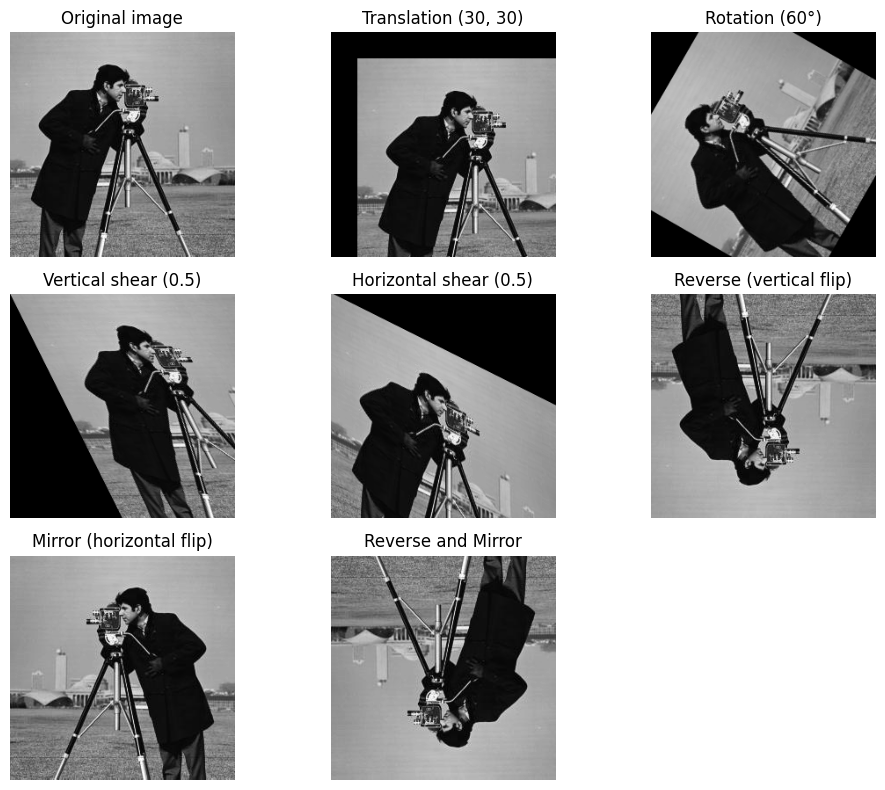

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
I = cv2.imread('/kaggle/input/images-for-cv/cameraman.jpg', cv2.IMREAD_GRAYSCALE)

# Image Translation by (30, 30)
def translate_image(image, tx, ty):
    height, width = image.shape
    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    translated_img = cv2.warpAffine(image, translation_matrix, (width, height))
    return translated_img

# Image Rotation by 60 degrees
def rotate_image(image, angle):
    height, width = image.shape
    center = (width // 2, height // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_img = cv2.warpAffine(image, rotation_matrix, (width, height))
    return rotated_img

# Vertical Shear (affine transformation)
def vertical_shear(image, shear_factor):
    height, width = image.shape
    shear_matrix = np.float32([[1, shear_factor, 0], [0, 1, 0]])
    sheared_img = cv2.warpAffine(image, shear_matrix, (width, height))
    return sheared_img

# Horizontal Shear (affine transformation)
def horizontal_shear(image, shear_factor):
    height, width = image.shape
    shear_matrix = np.float32([[1, 0, 0], [shear_factor, 1, 0]])
    sheared_img = cv2.warpAffine(image, shear_matrix, (width, height))
    return sheared_img

# Reverse image (flip vertically)
def reverse_image(image):
    return cv2.flip(image, 0)

# Mirror image (flip horizontally)
def mirror_image(image):
    return cv2.flip(image, 1)

# Reverse and Mirror image
def reverse_mirror_image(image):
    return cv2.flip(image, -1)

# Perform transformations using OpenCV
translate_img = translate_image(I, 30, 30)
rotate_img = rotate_image(I, 60)
vJ = vertical_shear(I, 0.5)
hJ = horizontal_shear(I, 0.5)
R = reverse_image(I)
M = mirror_image(I)
RM = reverse_mirror_image(I)

# Display all transformations
plt.figure(figsize=(10, 8))

plt.subplot(3, 3, 1)
plt.imshow(I, cmap='gray')
plt.title('Original image')
plt.axis('off')

plt.subplot(3, 3, 2)
plt.imshow(translate_img, cmap='gray')
plt.title('Translation (30, 30)')
plt.axis('off')

plt.subplot(3, 3, 3)
plt.imshow(rotate_img, cmap='gray')
plt.title('Rotation (60°)')
plt.axis('off')

plt.subplot(3, 3, 4)
plt.imshow(vJ, cmap='gray')
plt.title('Vertical shear (0.5)')
plt.axis('off')

plt.subplot(3, 3, 5)
plt.imshow(hJ, cmap='gray')
plt.title('Horizontal shear (0.5)')
plt.axis('off')

plt.subplot(3, 3, 6)
plt.imshow(R, cmap='gray')
plt.title('Reverse (vertical flip)')
plt.axis('off')

plt.subplot(3, 3, 7)
plt.imshow(M, cmap='gray')
plt.title('Mirror (horizontal flip)')
plt.axis('off')

plt.subplot(3, 3, 8)
plt.imshow(RM, cmap='gray')
plt.title('Reverse and Mirror')
plt.axis('off')

# Show the plots
plt.tight_layout()
plt.show()

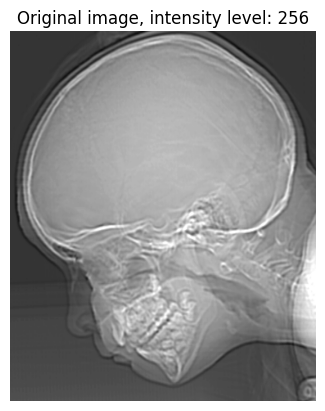

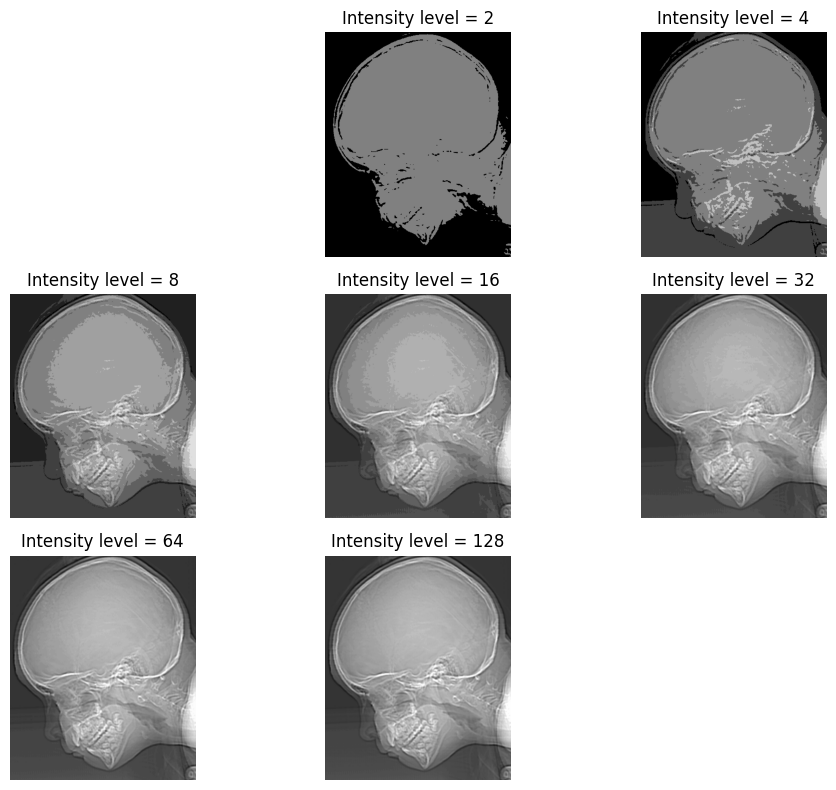

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
I = cv2.imread('/kaggle/input/images-for-cv/Fig0221(a).tif')

# Display the original image
plt.figure()
plt.imshow(I, cmap='gray', vmin=0, vmax=255)
plt.title('Original image, intensity level: 256')
plt.axis('off')

# Initialize intensity level bits
b = 7

plt.figure(figsize=(10, 8))

while b > 0:
    intensity_level = 2**b
    current_gray_level = 256 / intensity_level

    # Reduce the image intensity level
    reduced_image = np.uint8(np.floor(I / intensity_level) * intensity_level)

    L = current_gray_level - 1

    # Plot the reduced image
    plt.subplot(3, 3, 8 - b + 1)
    plt.imshow(reduced_image, cmap='gray', vmin=0, vmax=int(L))
    plt.title(f'Intensity level = {int(current_gray_level)}')
    plt.axis('off')

    b -= 1

plt.tight_layout()
plt.show()

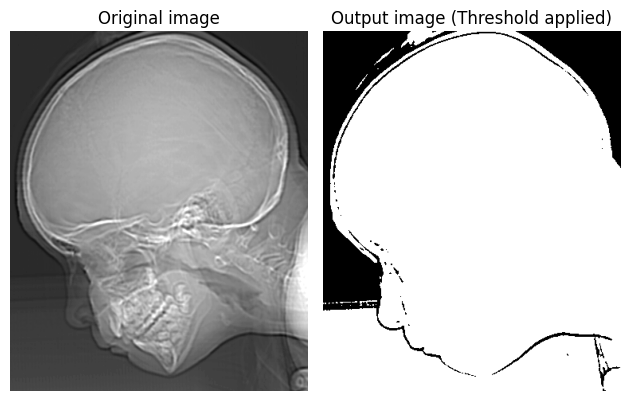

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
I = cv2.imread('/kaggle/input/images-for-cv/Fig0221(a).tif')

# Check if the image is RGB (3 channels) and convert it to grayscale if necessary
if I.shape[2] == 3:
    I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)

# Get the dimensions of the image
m, n = I.shape

# Initialize the output image with zeros (same size as original image)
I2 = np.zeros((m, n), dtype=np.uint8)

# Apply threshold: set pixel to 255 if it's greater than 64, otherwise set to 0
for i in range(m):
    for j in range(n):
        if I[i, j] > 64:
            I2[i, j] = 255
        else:
            I2[i, j] = 0

# Display the original and processed images
plt.figure()

plt.subplot(1, 2, 1)
plt.imshow(I, cmap='gray')
plt.title('Original image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(I2, cmap='gray')
plt.title('Output image (Threshold applied)')
plt.axis('off')

# Show the plots
plt.tight_layout()
plt.show()

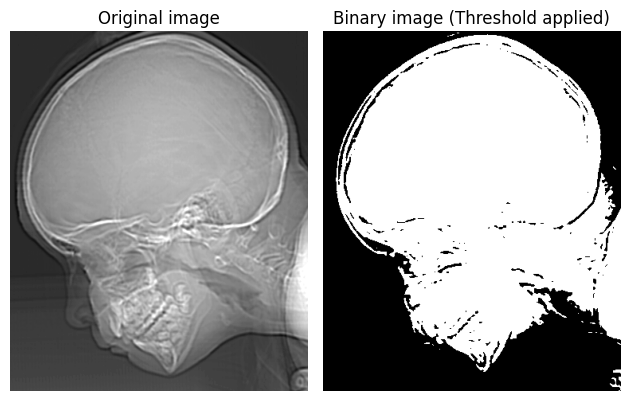

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
I = cv2.imread('/kaggle/input/images-for-cv/Fig0221(a).tif', cv2.IMREAD_GRAYSCALE)

# Set the threshold value
threshold = 128  # You can adjust the threshold value as needed

# Get the dimensions of the image
m, n = I.shape

# Initialize the binary image with zeros (same size as original image)
binary_image = np.zeros((m, n), dtype=np.uint8)

# Manually apply the threshold
for i in range(m):
    for j in range(n):
        if I[i, j] > threshold:
            binary_image[i, j] = 255  # Set pixel to white
        else:
            binary_image[i, j] = 0  # Set pixel to black

# Display the original and binary images
plt.figure()

plt.subplot(1, 2, 1)
plt.imshow(I, cmap='gray')
plt.title('Original image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(binary_image, cmap='gray')
plt.title('Binary image (Threshold applied)')
plt.axis('off')

# Show the plots
plt.tight_layout()
plt.show()

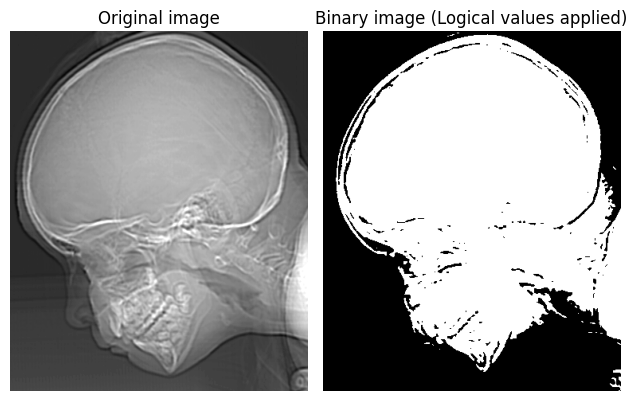

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
I = cv2.imread('/kaggle/input/images-for-cv/Fig0221(a).tif', cv2.IMREAD_GRAYSCALE)

# Set the threshold value
threshold = 128  # You can adjust the threshold value as needed

# Get the dimensions of the image
m, n = I.shape

# Initialize the binary image as a logical (boolean) array
binary_image_logical = np.zeros((m, n), dtype=bool)

# Manually apply the threshold using logical values
for i in range(m):
    for j in range(n):
        if I[i, j] > threshold:
            binary_image_logical[i, j] = True  # Set pixel to True (white in boolean)
        else:
            binary_image_logical[i, j] = False  # Set pixel to False (black in boolean)

# Convert logical values (True/False) to uint8 format for display (True -> 255, False -> 0)
binary_image_uint8 = np.uint8(binary_image_logical) * 255

# Display the original and binary images
plt.figure()

plt.subplot(1, 2, 1)
plt.imshow(I, cmap='gray')
plt.title('Original image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(binary_image_uint8, cmap='gray')
plt.title('Binary image (Logical values applied)')
plt.axis('off')

# Show the plots
plt.tight_layout()
plt.show()

# What is the difference between this block of code and the above code?

1. First Code Block:
Converts a grayscale image into a binary image by applying a threshold. Pixels above the threshold are set to 255 (white), and those below are set to 0 (black), directly using np.uint8 format.

2. Second Code Block:
Converts a grayscale image into a binary image through a logical (boolean) array where pixels are initially True (white) or False (black) based on the threshold, and then converts this to np.uint8 format for visualization.